<a id = 'title'></a>
# GoodReads Dataset EDA

##### Author: Quinci Birker

### Introduction

This dataset is from Goodreads, a popular online book catalog. Users can search, review, and discover books here. This dataset was last updated on November 9, 2020, and it includes over 52,000 books. 

This EDA will explore and begin cleaning the data, present visuals, and offer initial insights for further investigation. The goal here is to gain an understanding of the dataset and formulate hypotheses that will serve as a foundation for constructing a model. The objective of this model is to recommend books based on an individuals previous preferences. 

### Data Dictionary

| Attributes  | Description | Completeness |
| ------------- | ------------- | ------------- | 
| bookId  | Book Identifier as in goodreads.com  | 100 |
| title  | Book title | 100 |
| series | Series Name | 45 |
| author | Book's Author | 100 |
| description | Book's description | 97 |
| language | Book's language | 93 |
| isbn | Book's ISBN | 92 |
| genres | Book's genres | 91 |
| characters | Main characters | 26 |
| bookFormat | Type of binding | 97 |
| edition | Type of edition (ex. Anniversary Edition) | 9 |
| pages | Number of pages | 96 |
| publisher | Editorial | 93 |
| publishDate | publication date | 98 |
| firstPublishDate | Publication date of first edition | 59 |
| awards | List of awards | 20 |
| numRatings | Number of total ratings | 100 |
| ratingsByStars | Number of ratings by stars | 97 |
| likedPercent | Derived field, percent of ratings over 2 starts (as in GoodReads) | 99 |
| setting | Story setting | 22 |
| coverImg | URL to cover image | 99 |
| bbeScore | Score in Best Books Ever list | 100 |
| bbeVotes | Number of votes in Best Books Ever list | 100 |
| price | Book's price (extracted from Iberlibro) | 73 |


Target Variable | Description   | Completeness  |
| ------------- | ------------- | ------------- | 
| rating | Global goodreads rating | 100 |


More information on the dataset can be found at https://zenodo.org/records/4265096

### Table of Contents
---------------------------------------
- [Import Dataset and Libraries](#import)
---------------------------------------
- [Preliminary Data Exploration](#pre_explore)
---------------------------------------
- [Partial Data Cleaning](#data_clean)
---------------------------------------
- [Descriptive Statistics](#desc_statistics)
---------------------------------------
- [Data Distribution](#data_visualization)
---------------------------------------
- [Visual Exploration](#initial_exploration)
---------------------------------------
- [Summary & Insights](#summary)
---------------------------------------


<a id = 'import'></a>
### Import Dataset and Libraries

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read data from the CSV file:
raw_df = pd.read_csv('data/books_1.Best_Books_Ever.csv')

<a id = 'pre_explore'></a>
### Preliminary Data Exploration

In [3]:
# check number of rows and columns:
raw_df.shape
print(f'There are {raw_df.shape[0]} rows and {raw_df.shape[1]} columns in the data')

There are 52478 rows and 25 columns in the data


In [4]:
# check the data types for every column:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

The majority of these columns are objects. Columns that will need to change from object to numeric:
- pages
- publish date
- first publish date
- price

In [5]:
# sanity check the first five rows:
raw_df.head()

bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language           isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9780439023481   
1  There is a door at the end of a silent corrido...  English  9780439358071   
2  The unforgettable novel of a childhood in a sl...  English  9999999999999   
3  Alternate cover edition of ISBN 9780679783268S...  English  9999999999999   
4  About three things I was absolutely positive.\...  English  9780316015844   

                                              genres  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   

                                          characters  ... firstPublishDate  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  ...              NaN   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  ...         06/21/03   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  ...         07/11/60   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  ...         01/28/13   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  ...         10/05/05   

                                              awards numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...    6376780   
1  ['Bram Stoker Award for Works for Young Reader...    2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...    4501075   
3                                                 []    2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...    4964519   

                                      ratingsByStars likedPercent  \
0  ['3444695', '1921313', '745221', '171994', '93...         96.0   
1  ['1593642', '637516', '222366', '39573', '14526']         98.0   
2  ['2363896', '1333153', '573280', '149952', '80...         95.0   
3  ['1617567', '816659', '373311', '113934', '767...         94.0   
4  ['1751460', '1113682', '1008686', '542017', '5...         78.0   

                                             setting  \
0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1  ['Hogwarts School of Witchcraft and Wizardry (...   
2               ['Maycomb, Alabama (United States)']   
3  ['United Kingdom', 'Derbyshire, England (Unite...   
4  ['Forks, Washington (United States)', 'Phoenix...   

                                            coverImg  bbeScore bbeVotes  price  
0  https://i.gr-assets.com/images/S/compressed.ph...   2993816    30516   5.09  
1  https://i.gr-assets.com/images/S/compressed.ph...   2632233    26923   7.38  
2  https://i.gr-assets.com/images/S/compressed.ph...   2269402    23328    NaN  
3  https://i.gr-assets.com/images/S/compressed.ph...   1983116    20452    NaN  
4  https://i.gr-assets.com/images/S/compressed.ph...   1459448    14874    2.1  

[5 rows x 25 columns]

In [6]:
# check last 5 rows:
raw_df.tail()

bookId                title  \
52473            11492014-fractured            Fractured   
52474              11836711-anasazi              Anasazi   
52475               10815662-marked               Marked   
52476          11330278-wayward-son          Wayward Son   
52477  10991547-daughter-of-helaman  Daughter of Helaman   

                     series  \
52473            Fateful #2   
52474     Sense of Truth #2   
52475     Soul Guardians #1   
52476                   NaN   
52477  Stripling Warrior #1   

                                                  author  rating  \
52473                   Cheri Schmidt (Goodreads Author)    4.00   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                                             description language  \
52473  The Fateful Trilogy continues with Fractured. ...  English   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...  English   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   
52477  Fighting in Helaman's army is Keturah's deepes...  English   

                isbn                                             genres  \
52473  2940012616562  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...   
52474  9999999999999                         ['Mystery', 'Young Adult']   
52475  9781461017097  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...   
52476  9781450755634  ['Fiction', 'Mystery', 'Historical Fiction', '...   
52477  9781599554976  ['Lds Fiction', 'Historical Fiction', 'Young A...   

      characters  ... firstPublishDate  \
52473         []  ...              NaN   
52474         []  ...  August 3rd 2011   
52475         []  ...  March 15th 2011   
52476         []  ...   April 5th 2011   
52477         []  ...              NaN   

                                        awards numRatings  \
52473                                       []        871   
52474                                       []         37   
52475  ["Readers' Favorite Book Award (2011)"]       6674   
52476                                       []        238   
52477                                       []        246   

                               ratingsByStars likedPercent setting  \
52473       ['311', '310', '197', '42', '11']         94.0      []   
52474             ['16', '14', '5', '2', '0']         95.0      []   
52475  ['2109', '1868', '1660', '647', '390']         84.0      []   
52476           ['77', '78', '59', '19', '5']         90.0      []   
52477          ['106', '73', '42', '17', '8']         90.0      []   

                                                coverImg  bbeScore bbeVotes  \
52473  https://i.gr-assets.com/images/S/compressed.ph...         0        1   
52474  https://i.gr-assets.com/images/S/compressed.ph...         0        1   
52475  https://i.gr-assets.com/images/S/compressed.ph...         0        1   
52476  https://i.gr-assets.com/images/S/compressed.ph...         0        1   
52477  https://i.gr-assets.com/images/S/compressed.ph...         0        1   

       price  
52473    NaN  
52474    NaN  
52475   7.37  
52476   2.86  
52477   5.20  

[5 rows x 25 columns]

In [7]:
raw_df.sample(5)

bookId  \
2208                 11691.Snow   
12373  443765.Conan_of_Cimmeria   
8060              16033909-burn   
14751     228069.xxxHolic_Vol_2   
38136   98475.Stonewall_Jackson   

                                                   title               series  \
2208                                                Snow                  NaN   
12373                                  Conan of Cimmeria  Conan the Barbarian   
8060                                                Burn        Breathless #3   
14751                                   xxxHolic, Vol. 2          xxxHOLiC #2   
38136  Stonewall Jackson: The Man, the Soldier, the L...                  NaN   

                                                  author  rating  \
2208            Orhan Pamuk, Maureen Freely (Translator)    3.59   
12373  Robert E. Howard, L. Sprague de Camp, Lin Cart...    4.11   
8060                       Maya Banks (Goodreads Author)    4.01   
14751               CLAMP, William Flanagan (Translator)    4.19   
38136                             James I. Robertson Jr.    4.27   

                                             description language  \
2208   One of multiple covers for ISBN 9780375706868....  English   
12373  Contents:9 · Introduction · L. Sprague de Camp...  English   
8060   Ash, Jace, and Gabe: three of the wealthiest, ...  English   
14751  WATCH OUT FOR WITCHESKimihiro Watanuki thought...  English   
38136  One of the most successful Civil War books in ...  English   

                isbn                                             genres  \
2208   9999999999999  ['Fiction', 'Literature', 'Contemporary', 'Tur...   
12373  9780441114535  ['Fantasy', 'Fiction', 'Sword and Sorcery', 'A...   
8060   9780425267080  ['Romance', 'Erotica', 'BDSM', 'Contemporary R...   
14751  9780345471192  ['Manga', 'Fantasy', 'Graphic Novels', 'Comics...   
38136  9780028650647  ['Biography', 'History', 'Civil War', 'America...   

                                              characters  ...  \
2208                                                  []  ...   
12373                            ['Conan the Barbarian']  ...   
8060   ['Bethany', 'Josie', 'Gabe Hamilton', 'Mia Cre...  ...   
14751             ['Kimihiro Watanuki', 'Yuko Ichihara']  ...   
38136             ['Robert E. Lee', 'Stonewall Jackson']  ...   

      firstPublishDate                                             awards  \
2208          10/28/02  ['Independent Foreign Fiction Prize Nominee fo...   
12373         10/29/69                                                 []   
8060               NaN                                                 []   
14751         10/16/03                                                 []   
38136         02/18/97  ['Jefferson Davis Award (1997)', 'Douglas Sout...   

      numRatings                              ratingsByStars likedPercent  \
2208       37991  ['8156', '13658', '10485', '4003', '1689']         85.0   
12373       4681        ['1803', '1757', '971', '122', '28']         97.0   
8060       38558   ['15220', '12500', '7660', '2360', '818']         92.0   
14751       4839        ['2305', '1512', '752', '194', '76']         94.0   
38136       2219          ['1098', '731', '311', '59', '20']         96.0   

                                           setting  \
2208                             ['Kars (Turkey)']   
12373                                  ['Hyboria']   
8060   ['New York City, New York (United States)']   
14751                                           []   
38136                                           []   

                                                coverImg  bbeScore bbeVotes  \
2208   https://i.gr-assets.com/images/S/compressed.ph...      1750       24   
12373  https://i.gr-assets.com/images/S/compressed.ph...       192        2   
8060   https://i.gr-assets.com/images/S/compressed.ph...       319        6   
14751  https://i.gr-assets.com/images/S/compressed.ph...       170        3   
38136  https://

Notes from looking at the begining, end, and a random sample of the dataset:

1. Columns to be deleted that are not useful for this project:
    - `bookId` does not seem to be useful for my project. The index will be used instead of this.  
    - `isbn` is a numeric book identifier. I will also delete this since I am using the index to refer to each unique book in the dataset.
    - `coverImg` is a url to the books cover image. For this project, I will not be using this in my modeling.  
2. There are quite a few columns that are missing data. Further analysis will be performed.

3. Columns that stand out for further investigation:
    - `firstPublishDate` ~ missing values and different formats (i.e. 07/29/96, 1989, April 5th 2011)
    - `price` ~ the values don't seem to be accurate. The entire column might need to be deleted

In [8]:
# Check that total index matches total number of rows:
raw_df.index.nunique() == raw_df.shape[0]

True

The total index count is equal to the total number of rows in the dataset. 

In [9]:
# Count the number of missing values for each column:
raw_df.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [10]:
# Percentage of missing values for each column:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

bookId              0.000000
title               0.000000
series              0.552765
author              0.000000
rating              0.000000
description         0.025496
language            0.072526
isbn                0.000000
genres              0.000000
characters          0.000000
bookFormat          0.028069
edition             0.905579
pages               0.044724
publisher           0.070430
publishDate         0.016769
firstPublishDate    0.406380
awards              0.000000
numRatings          0.000000
ratingsByStars      0.000000
likedPercent        0.011853
setting             0.000000
coverImg            0.011529
bbeScore            0.000000
bbeVotes            0.000000
price               0.273734
dtype: float64


There are 12 columns that have missing values. The column name and rounded percent of missing values in descending order:
- edition: 91%
- series: 55%
- first publish date: 41%
- price 27%
- language: 7%
- publisher: 7%
- pages: 4%
- description: 3%
- book format: 3%
- publish date: 2%
- liked percent: 1%
- cover image: 1%

The first step in the data cleaning process is to delete all the columns that I will not be using for modeling:
- bookid: using dataset index instead
- isbn: using dataset index instead
- cover image: won't be used for this modeling (maybe in future projects)
- edition: over 91% of the values are missing
- first publish date: over 41% missing and my assumption is that publish date will be more relevant than first publish date
- price: the prices do not seem accurate enough to use. Second, depending on the date of purchase and retailer, the price of books can very greatly
- awards: there is limited values in this dataset, around 80% missing
- characters: there is limited values in this dataset, around 74% missing
- setting: there is limited values in this dataset, around 55% missing. Second, a ton of the books have unique settings and this would be a lot to go through

In [11]:
# Check for duplicated columns:
raw_df.T.duplicated().sum()

0

There are no duplicated columns

In [12]:
# Checking for duplicate rows: 
raw_df[raw_df.duplicated()]

bookId  \
37431                           8794263-promises-to-keep   
37432                                      1909590.Click   
37433                 23394408-die-unendlichkeit-schl-ft   
37434                                 7544945-death-note   
37435                                  25886017-m-scaras   
37436                      2669775-el-siglo-de-las-luces   
37437                        24633605-always-and-forever   
37438                           237086.Dafne_desvanecida   
37439                                           17786377   
37440    7452583-jag-vill-inte-d-jag-vill-bara-inte-leva   
37441                                           18480662   
37442                        1258333.Cantarella_Volume_1   
37443                                  17999135-exposure   
37444                           220362.Manon_des_sources   
37445                                           23438427   
37446                                  650584.Shadowdale   
37447                           24644867-traiesc-din-nou   
37448                          22587955-count-with-kenny   
37449             8438589-the-creatures-that-time-forgot   
37450                          17337543-the-game-changer   
37451                       22372599-the-seahorse-legacy   
37452                    9807272-big-nate-boredom-buster   
37454              23590446-how-to-fight-a-dragon-s-fury   
37456                             16058645-the-bookstore   
37457          15733451-chairul-tanjung-si-anak-singkong   
37458                                           25454580   
37459                              3486235-night-letters   
37460                         11737313-three-times-lucky   
37461                              13614864-know-not-why   
37462                              21900147-gone-too-far   
37463                      15741217-writing-scary-scenes   
37464  6665889-the-science-fiction-hall-of-fame-volum...   
37465                                2081377.Ghosthunter   
37466                                  3973924-bal-masqu   
37467                        18849994-beautifully-broken   
37468  8538135-catfancy-s-naughty-no-more-change-unwa...   
37469                 18813012-the-rocker-that-holds-her   
37470                                           17406982   
37471                                 21254063-sorceress   
37472                                25590067-conviction   
37473                           383514.Her_Royal_Spyness   
37474              2074104.The_Legend_of_Colton_H_Bryant   
37475                      20262067-le-festin-du-serpent   
37478                                    23519340-silber   
37479                              29742514-mays-landing   
37480                                26845691-beatlebone   
37481                22916606-gli-enigmi-dei-vedovi-neri   
37482                                         13571757-1   
37483    1481056.Gifts_and_Ministries_of_the_Holy_Spirit   
37484                        27074409-deadly-class-vol-1   

                                                   title  \
37431                                   Promises to Keep   
37432                                              Click   
37433                          Die Unendlichkeit schläft   
37434                  Death Note: Black Edition, Vol. 2   
37435                                           Máscaras   
37436                              El siglo de las luces   
37437                                 Always and Forever   
37438                                  Dafne desvanecida   
37439                                       فضولية العلم   
37440          Jag vill inte dö, jag vill bara inte leva   
37441                     لا سكاكين في مطابخ هذه المدينة   
37442                               Cantarella, Volume 1   
37443                                           Exposure   
37444                                  Manon des sources   
37445                                       পিতা ও পুত্র   
37446                        

These duplicated rows have all the same bbeScore and bbeVotes, yet all the book titles are unique, meaning that these rows are still relevant and will not be dropped.

Check the for description statistics for the number of ratings columns. If some books don't have any or very limited amounts of ratings, this might not be helpful for the modeling. 

In [13]:
raw_df[['numRatings', 'bbeVotes']].describe()

numRatings      bbeVotes
count  5.247800e+04  52478.000000
mean   1.787865e+04     22.529003
std    1.039448e+05    369.158541
min    0.000000e+00     -4.000000
25%    3.410000e+02      1.000000
50%    2.307000e+03      1.000000
75%    9.380500e+03      2.000000
max    7.048471e+06  30516.000000

`numRatings` has a mean number of around 17,879, meaning that most books in this dataset have a lot people who have rated the book. There are some books that have zero ratings. In the data cleaning below, I will look into dropping rows that have low to no ratings since these would not give an accurate rating score. 

`bbeVotes` has a mean number of around 28 votes per book. The minimum number of votes is negative 4 which does not make sense and will need further investigating. 

<a id = 'data_clean'></a>
### Partial Data Cleaning

Dropping the columns that will not be used in the analysis/modeling.

In [14]:
# Drop the original index (`bookId`)
raw_df.reset_index(drop=True, inplace=True)
raw_df.drop('bookId', axis=1, inplace=True)

In [15]:
# Drop specified column and check that changes have been made to raw_df:

raw_df = raw_df.drop(['isbn', 'coverImg', 'edition', 'firstPublishDate', 'price', 'awards', 'setting', 'characters'], axis=1)
raw_df.head(1)

title               series           author  rating  \
0  The Hunger Games  The Hunger Games #1  Suzanne Collins    4.33   

                                         description language  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   

                                              genres bookFormat pages  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  Hardcover   374   

          publisher publishDate  numRatings  \
0  Scholastic Press    09/14/08     6376780   

                                      ratingsByStars  likedPercent  bbeScore  \
0  ['3444695', '1921313', '745221', '171994', '93...          96.0   2993816   

   bbeVotes  
0     30516

Dealing with numRatings column:

In [16]:
raw_df.loc[raw_df['numRatings'] < 100].count()

title             8048
series            1554
author            8048
rating            8048
description       7243
language          6575
genres            8048
bookFormat        7534
pages             6949
publisher         6774
publishDate       7699
numRatings        8048
ratingsByStars    8048
likedPercent      7426
bbeScore          8048
bbeVotes          8048
dtype: int64

There are 8,048 books in this dataset that have less than 100 reviews. I will be dropping these rows since I want a enough reviews so that the rating is significant. 

In [17]:
# Drop rows that have less than 100 reviews:
raw_df = raw_df.drop(raw_df[raw_df['numRatings'] < 100].index)

# Confirm new size:
raw_df.shape

(44430, 16)

In [18]:
# Review percentage of missing values for each column after dropping 8,048 books:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

title             0.000000
series            0.506730
author            0.000000
rating            0.000000
description       0.011996
language          0.052510
genres            0.000000
bookFormat        0.021585
pages             0.028089
publisher         0.054513
publishDate       0.011951
numRatings        0.000000
ratingsByStars    0.000000
likedPercent      0.000000
bbeScore          0.000000
bbeVotes          0.000000
dtype: float64


After removing the rows with lower number of ratings, the missing values in the columns above have decreased. 

In [19]:
raw_df.loc[raw_df['bbeVotes']< 15].count()

title             41425
series            20335
author            41425
rating            41425
description       40909
language          39150
genres            41425
bookFormat        40473
pages             40194
publisher         39068
publishDate       40898
numRatings        41425
ratingsByStars    41425
likedPercent      41425
bbeScore          41425
bbeVotes          41425
dtype: int64

There are 38,778 books in this dataset that have less than 15 votes, some of these being negative. I do not believe that this column will be a good fit for the modeling so I will be dropping this column.

In [20]:
raw_df = raw_df.drop(['bbeVotes'], axis=1)

In [21]:
raw_df.head(1)

title               series           author  rating  \
0  The Hunger Games  The Hunger Games #1  Suzanne Collins    4.33   

                                         description language  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   

                                              genres bookFormat pages  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  Hardcover   374   

          publisher publishDate  numRatings  \
0  Scholastic Press    09/14/08     6376780   

                                      ratingsByStars  likedPercent  bbeScore  
0  ['3444695', '1921313', '745221', '171994', '93...          96.0   2993816

For the publish date, the first 30,000 books in the dataset are formatted in mm/dd/yyyy while the last 22,478 books are formated in Month Day Year. I will reformate all the dates to be in mm/dd/yyyy.

Reformatting the publish date column and setting the datatype to a numeric value:

In [22]:
# Change publish date to datetime format:
raw_df['publishDate'] = pd.to_datetime(raw_df['publishDate'], errors='coerce') # errors='coerce' used if value cannot be converted to datetime format
# Reformat publish date to mm/dd/yyyy format:
raw_df['publishDate'] = raw_df['publishDate'].dt.strftime('%m/%d/%Y')
raw_df['publishDate'] = raw_df['publishDate'].astype('datetime64[ns]')

# Confirm changes were updated:
raw_df.sample(5)

/var/folders/b1/ck799gjn11b_0zbx9y3pynvr0000gn/T/ipykernel_4177/1085856217.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_df['publishDate'] = pd.to_datetime(raw_df['publishDate'], errors='coerce') # errors='coerce' used if value cannot be converted to datetime format


title  \
16161                                  Tulips & Chimneys   
4216                              Murder at the Vicarage   
13951                           La flor de lis y el león   
10026  An Anthropologist on Mars: Seven Paradoxical T...   
32497                              Missä kuljimme kerran   

                      series  \
16161                    NaN   
4216          Miss Marple #1   
13951  The Accursed Kings #6   
10026                    NaN   
32497                    NaN   

                                                 author  rating  \
16161  E.E. Cummings, Richard S. Kennedy (Introduction)    4.37   
4216                                    Agatha Christie    4.06   
13951   Maurice Druon, María Orozco Bravo (Translation)    4.20   
10026                                      Oliver Sacks    4.16   
32497     Kjell Westö, Katriina Savolainen (Translator)    3.96   

                                             description language  \
16161  Fresh and candid, by turns earthy, tender, def...  English   
4216   ‘Anyone who murdered Colonel Protheroe,’ decla...  English   
13951  Con la muerte de Carlos IV se extingue la dina...  Spanish   
10026  Paradoxical portraits of seven neurological pa...  English   
32497  Komea historiallinen romaani henkii kertomisen...  Finnish   

                                                  genres bookFormat pages  \
16161  ['Poetry', 'Classics', '20th Century', 'Americ...  Paperback   208   
4216   ['Mystery', 'Fiction', 'Classics', 'Crime', 'M...  Hardcover   288   
13951  ['Historical Fiction', 'Fiction', 'Historical'...  Paperback   344   
10026  ['Nonfiction', 'Science', 'Psychology', 'Neuro...  Paperback   318   
32497  ['Fiction', 'Finnish Literature', 'Historical ...  Hardcover   589   

                              publisher publishDate  numRatings  \
16161        Liveright Publishing Corp.  1996-08-17        1284   
4216   Black Dog & Leventhal Publishers  2006-09-01      144801   
13951                       Ediciones B  2006-11-01        4519   
10026                           Picador  1995-01-01       18244   
32497                             Otava  2007-01-01        2207   

                                    ratingsByStars  likedPercent  bbeScore  
16161             ['690', '417', '146', '25', '6']          98.0       147  
4216   ['53241', '54770', '30429', '4543', '1818']          96.0       736  
13951          ['1853', '1820', '749', '85', '12']          98.0       179  
10026       ['7241', '7566', '2702', '494', '241']          96.0       252  
32497           ['670', '957', '424', '124', '32']          93.0        93

In [23]:
# Check the changes were updated:
raw_df['publishDate'].info()

<class 'pandas.core.series.Series'>
Index: 44430 entries, 0 to 52477
Series name: publishDate
Non-Null Count  Dtype         
--------------  -----         
43329 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 694.2 KB


The pages column is missing just over 2 percent of it's values. This isn't a significant amount so I will be replacing the values with the mean number of pages.

In [24]:
# Convert pages column into a numeric value
raw_df['pages'] = pd.to_numeric(raw_df['pages'], errors='coerce')
# Mean number of pages
mean_pages = raw_df['pages'].mean()
# Fill all empty values with the mean number of pages
raw_df['pages'].fillna(mean_pages, inplace=True)
# Convert 'pages' to integer type
raw_df['pages'] = raw_df['pages'].astype(int)

#Confirm changes:
raw_df['pages'].info()

<class 'pandas.core.series.Series'>
Index: 44430 entries, 0 to 52477
Series name: pages
Non-Null Count  Dtype
--------------  -----
44430 non-null  int64
dtypes: int64(1)
memory usage: 694.2 KB


Looking at series which is missing 50% of it's values.

In [25]:
raw_df.loc[raw_df['series'].isna()]

title series  \
3                                    Pride and Prejudice    NaN   
5                                         The Book Thief    NaN   
6                                            Animal Farm    NaN   
9                                     Gone with the Wind    NaN   
10                                The Fault in Our Stars    NaN   
...                                                  ...    ...   
52463                          The Natural Way of Things    NaN   
52464                                          Algedonic    NaN   
52469  Heal Your Body: The Mental Causes for Physical...    NaN   
52470                                  Attracted to Fire    NaN   
52476                                        Wayward Son    NaN   

                                                  author  rating  \
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
5                        Markus Zusak (Goodreads Author)    4.37   
6      George Orwell, Russell Baker (Preface), C.M. W...    3.95   
9                                      Margaret Mitchell    4.30   
10                         John Green (Goodreads Author)    4.21   
...                                                  ...     ...   
52463                                     Charlotte Wood    3.53   
52464                        R.H. Sin (Goodreads Author)    3.71   
52469                                      Louise L. Hay    4.36   
52470                     DiAnn Mills (Goodreads Author)    4.14   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   

                                             description language  \
3      Alternate cover edition of ISBN 9780679783268S...  English   
5      Librarian's note: An alternate cover edition c...  English   
6      Librarian's note: There is an Alternate Cover ...  English   
9      Scarlett O'Hara, the beautiful, spoiled daught...  English   
10     Despite the tumor-shrinking medical miracle th...  English   
...                                                  ...      ...   
52463  Two women awaken from a drugged sleep to find ...  English   
52464  Bestselling poet r.h. Sin, author of the Whisk...      NaN   
52469  Heal Your Body is a fresh and easy step-by-ste...  English   
52470  Special Agent Meghan Connors' dream of one day...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   

                                                  genres  \
3      ['Classics', 'Fiction', 'Romance', 'Historical...   
5      ['Historical Fiction', 'Fiction', 'Young Adult...   
6      ['Classics', 'Fiction', 'Dystopia', 'Fantasy',...   
9      ['Classics', 'Historical Fiction', 'Fiction', ...   
10     ['Young Adult', 'Romance', 'Fiction', 'Contemp...   
...                                                  ...   
52463  ['Fiction', 'Dystopia', 'Australia', 'Feminism...   
52464    ['Poetry', 'Nonfiction', 'Romance', 'Feminism']   
52469  ['Self Help', 'Health', 'Nonfiction', 'Spiritu...   
52470  ['Christian Fiction', 'Christian', 'Suspense',...   
52476  ['Fiction', 'Mystery', 'Historical Fiction', '...   

                  bookFormat  pages                  publisher publishDate  \
3                  Paperback    279             Modern Library  2000-10-10   
5                  Hardcover    552            Alfred A. Knopf  2006-03-14   
6      Mass Market Paperback    141            Signet Classics  1996-04-28   
9      Mass Market Paperback   1037               Warner Books  1999-04-01   
10                 Hardcover    313               Dutton Books  2012-01-10   
...                      ...    ...                        ...         ...   
52463              Paperback    320              Allen & Unwin  2015-10-01   
52464              Paperback    128  Andrews McMeel Publishing  2017-12-12   
52469              Paperback     96                  Hay House  1984-01-01   
52470              Paperback    416   Tyndale House Publishers  2011-10-01   
52476              Pa

In order to use the series in the modeling, I will add a column:

- Book is in a series: value = 1
- Book is not in a series: value = 0

In [26]:
# Fills all NaN values with 0 and then any values that are not 0 are now 1
raw_df['series_bool'] = raw_df['series'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

# Confirm that these changes were made:
raw_df.head()

title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   
1  There is a door at the end of a silent corrido...  English   
2  The unforgettable novel of a childhood in a sl...  English   
3  Alternate cover edition of ISBN 9780679783268S...  English   
4  About three things I was absolutely positive.\...  English   

                                              genres bookFormat  pages  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  Hardcover    374   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...  Paperback    870   
2  ['Classics', 'Fiction', 'Historical Fiction', ...  Paperback    324   
3  ['Classics', 'Fiction', 'Romance', 'Historical...  Paperback    279   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...  Paperback    501   

                          publisher publishDate  numRatings  \
0                  Scholastic Press  2008-09-14     6376780   
1                   Scholastic Inc.  2004-09-28     2507623   
2  Harper Perennial Modern Classics  2006-05-23     4501075   
3                    Modern Library  2000-10-10     2998241   
4         Little, Brown and Company  2006-09-06     4964519   

                                      ratingsByStars  likedPercent  bbeScore  \
0  ['3444695', '1921313', '745221', '171994', '93...          96.0   2993816   
1  ['1593642', '637516', '222366', '39573', '14526']          98.0   2632233   
2  ['2363896', '1333153', '573280', '149952', '80...          95.0   2269402   
3  ['1617567', '816659', '373311', '113934', '767...          94.0   1983116   
4  ['1751460', '1113682', '1008686', '542017', '5...          78.0   1459448   

   series_bool  
0            1  
1            1  
2            1  
3            0  
4            1

Language column has around 5 percent missing values. 

In [27]:
# Look at the rows where the values for the language column are missing:
raw_df.loc[raw_df['language'].isna()]

title  \
503                                 Mistress Suffragette   
570                                   Invisible Monsters   
645                                House of Sand and Fog   
703                        The Awakening: Fate in Motion   
751              One Fish, Two Fish, Red Fish, Blue Fish   
...                                                  ...   
52390                             The Apprentice's Quest   
52411                                         Pixie Dust   
52416                                        When I Fall   
52429  Did God Really Command Genocide?: Coming to Te...   
52464                                          Algedonic   

                                 series                               author  \
503                                 NaN      Diana Forbes (Goodreads Author)   
570                                 NaN   Chuck Palahniuk (Goodreads Author)   
645                                 NaN                      Andre Dubus III   
703                                 NaN  Suzanne Boisvert (Goodreads Author)   
751                                 NaN                   Dr. Seuss (Reader)   
...                                 ...                                  ...   
52390  Warriors: A Vision of Shadows #1                          Erin Hunter   
52411          Pixie Dust Chronicles #1         Laura Lee (Goodreads Author)   
52416                 Alabama Summer #3        J. Daniels (Goodreads Author)   
52429                               NaN           Paul Copan, Matt Flannagan   
52464                               NaN          R.H. Sin (Goodreads Author)   

       rating                                        description language  \
503      4.34  \n  A young woman without prospects at a ball ...      NaN   
570      3.98  She's a catwalk model who has everything: a bo...      NaN   
645      3.85  In this “page-turner with a beating heart” (Bo...      NaN   
703      4.31  Exiled from Earth thousands of years ago, Sar ...      NaN   
751      4.13  One Fish Two Fish Red Fish Blue Fish is a 1960...      NaN   
...       ...                                                ...      ...   
52390    4.41  Erin Hunter’s #1 bestselling Warriors series c...      NaN   
52411    3.79  *A lonesome fairy with no clue how to wield he...      NaN   
52416    4.30  From New York Times bestselling author, J. Dan...      NaN   
52429    4.18  A common objection to belief in the God of the...      NaN   
52464    3.71  Bestselling poet r.h. Sin, author of the Whisk...      NaN   

                                                  genres      bookFormat  \
503    ['Fiction', 'Novels', 'Historical Fiction', 'D...  Kindle Edition   
570    ['Fiction', 'Contemporary', 'Thriller', 'Myste...       Paperback   
645    ['Fiction', 'Contemporary', 'Literary Fiction'...       Paperback   
703    ['Contemporary', 'Drama', 'Book Club', 'Fictio...  Kindle Edition   
751    ['Childrens', 'Picture Books', 'Fiction', 'Cla...       Hardcover   
...                                                  ...             ...   
52390  ['Fantasy', 'Animals', 'Middle Grade', 'Fictio...           ebook   
52411  ['Fantasy', 'Paranormal', 'Paranormal Romance'...           ebook   
52416  ['Romance', 'New Adult', 'Contemporary Romance...             NaN   
52429  ['Theology', 'Christian', 'Religion', 'Christi...       Paperback   
52464    ['Poetry', 'Nonfiction', 'Romance', 'Feminism']       Paperback   

       pages                        publisher publishDate  numRatings  \
503      333                Penmore Press LLC  2017-03-05        7647   
570      304             W. W. Norton Company  2018-05-01      128254   
645      368             W. W. Norton Company  2018-10-02      125230   
703      331                              NaN  2018-09-15        6682   
751       64  Harper Collins Children's Books  2003-10-06      165623   
...      ...                              ...         ...         ...   
52390    352        

For book format and description, I will replace the empty values with 'unknown'. These columns have a low percent of missing values, both being under 2 percent, therefore, this should not have a huge impact on the data. 

The publisher column is only missing around 5 percent so I will do the same with this column.

In [28]:
raw_df['description'].fillna('unknown', inplace=True)
raw_df['bookFormat'].fillna('unknown', inplace=True)
raw_df['publisher'].fillna('unknown', inplace=True)

Last step before moving onto descriptive statistics, check that the empty values have all been dealt with:

In [29]:
# Percentage of missing values for each column:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

title             0.000000
series            0.506730
author            0.000000
rating            0.000000
description       0.000000
language          0.052510
genres            0.000000
bookFormat        0.000000
pages             0.000000
publisher         0.000000
publishDate       0.024781
numRatings        0.000000
ratingsByStars    0.000000
likedPercent      0.000000
bbeScore          0.000000
series_bool       0.000000
dtype: float64


Some of the data has been cleaned. To keep track of what needs to be done and what is complete, I have created a summary table:

| Column           | Completeness | Problem                                                     | Solution                                                              | Update     |
|------------------|--------------|-------------------------------------------------------------|-----------------------------------------------------------------------|------------|
| bookId           | 100          | repetitive                                                  | drop column                                                           | complete   |
| title            | 100          | n/a                                                         | n/a                                                                   | n/a        |
| author           | 100          | n/a                                                         | n/a                                                                   | n/a        |
| rating           | 100          | n/a                                                         | n/a                                                                   | n/a        |
| numRating        | 100          | some books have very limited or zero ratings                | drop rows where ratings < 100                                         | complete   |
| bbeScore         | 100          | n/a                                                         | n/a                                                                   | n/a        |
| bbeVotes         | 100          | majority of books have less than 10 votes (some being neg.) | drop column                                                           | complete   |
| likedPercent     | 99           | missing data                                                | after dropping other rows, this now 100% complete                     | complete   |
| coverImg         | 99           | url/not useful for this project                             | drop column                                                           | complete   |
| publishDate      | 98           | current data type is object                                 | object --> datetime64[n]                                              | complete   |
| publishDate      | ''           | format differs between rows                                 | change all format to mm/dd/yyyy                                       | complete   |
| publishDate      | ''           | missing data                                                | leave a gap                                                           | incomplete |
| description      | 97           | missing data                                                | change the missing values to 'unknown'                                | complete   |
| bookFormat       | 97           | missing data                                                | change the missing values to 'unknown'                                | complete   |
| ratingsByStars   | 97           | missing data                                                | after dropping other rows, this now 100% complete                     | incomplete |
| ratingsByStars   | ''           | current format is in lists                                  | change format                                                         | incomplete |
| pages            | 96           | current data type is object                                 | object --> integer                                                    | incomplete |
| language         | 93           | missing data                                                | either fill with 'unknown' or filter the languages                    | incomplete |
| language         | ''           | has other languages other than english                      | drop these books from the dataset                                     | incomplete |
| publisher        | 93           | missing data                                                | change the missing values to 'unknown'                                | complete   |
| isbn             | 92           | repetitive                                                  | drop column                                                           | complete   |
| genres           | 91           | missing data                                                | change the missing values to 'unknown'                                | incomplete |
| genres           | ''           | format is in a list                                         | find the top genres and use a transaction encoder to seperate strings | incomplete |
| price            | 73           | prices are not accurate/relevant                            | drop column                                                           | complete   |
| firstPublishDate | 59           | missing a lot of values                                     | drop column                                                           | complete   |
| series           | 45           | missing 55% of the data                                     | change the missing values to 'unknown'                                | incomplete |
| series           | ''           | currently a categorical column                              | create a binary column                                                | complete   |
| characters       | 26           | 74% of data is missing                                      | drop column                                                           | complete   |
| setting          | 22           | 78% missing + too many unique values                        | drop column                                                           | complete   |
| awards           | 20           | 80% of data is missing                                      | drop column                                                           | complete   |
| edition          | 9            | 91% of data is missing                                      | drop column                                                           | complete   |

In [30]:
df = raw_df.copy()

<a id = 'desc_statistics'></a>
### Descriptive Statistics

Compute the basic statistics of all the numeric columns:

In [31]:
df.describe()

rating         pages                    publishDate  \
count  44430.000000  44430.000000                          43329   
mean       3.999350    340.526401  2006-04-14 03:33:59.659350528   
min        1.670000      0.000000            1873-01-01 00:00:00   
25%        3.820000    228.000000            2002-06-10 00:00:00   
50%        4.010000    320.000000            2008-01-30 00:00:00   
75%        4.200000    400.000000            2012-12-04 00:00:00   
max        4.980000  14777.000000            2072-03-01 00:00:00   
std        0.284346    249.326604                            NaN   

         numRatings  likedPercent      bbeScore  series_bool  
count  4.443000e+04  44430.000000  4.443000e+04  44430.00000  
mean   2.111152e+04     92.320887  2.324452e+03      0.49327  
min    1.000000e+02     18.000000  0.000000e+00      0.00000  
25%    9.610000e+02     90.000000  8.400000e+01      0.00000  
50%    3.551000e+03     93.000000  9.800000e+01      0.00000  
75%    1.199100e+04     96.000000  1.980000e+02      1.00000  
max    7.048471e+06    100.000000  2.993816e+06      1.00000  
std    1.126656e+05      5.035734  3.819465e+04      0.49996

Notes on the descriptive statistics for the numerical columns:

- `rating` has a mean number of around 4 stars (rating is from 1 to 5)    
- `pages` has a mean number of around 340 pages per book. Minimum is 0 (this will need further investigating)
- `publishDate` the books in this dataset range from 1873 - 2072 (dates > 2020 will need further investigating)
- `numRatings` has a mean number of 21,112. This is quite a large number of ratings for a book. 
- `likedPercent` has reletively high mean number of 92 percent. This means that the average book has a high liked percent

<a id = 'data_visualization'></a>
### Data Distribution

Visualize the distribution for all the numerical columns:

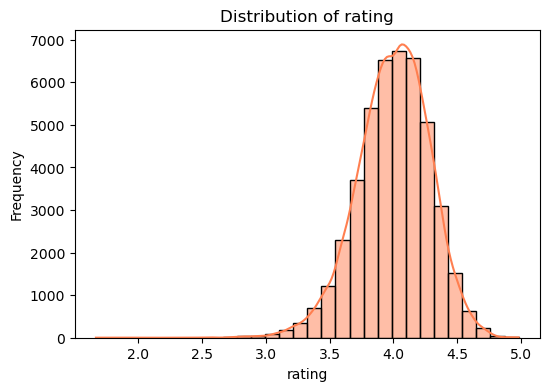

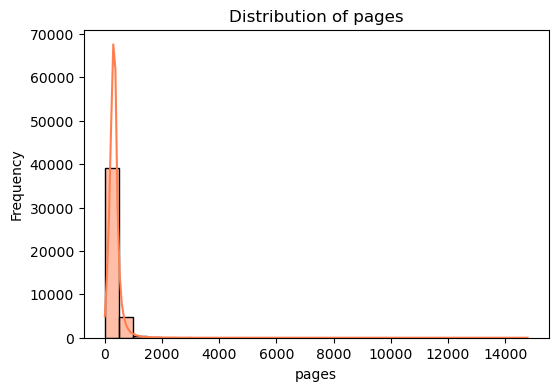

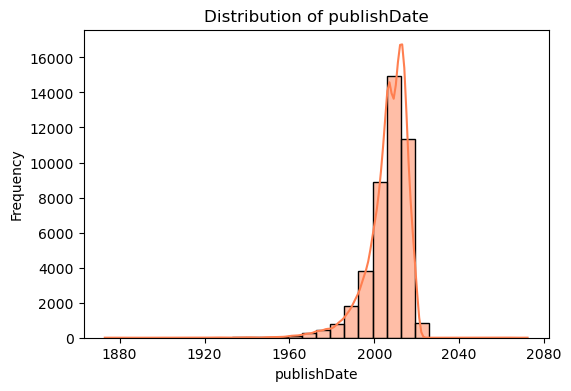

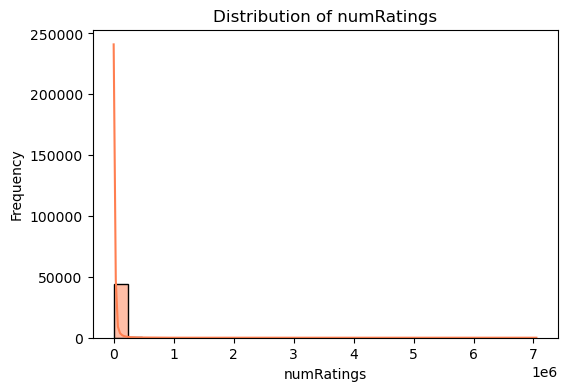

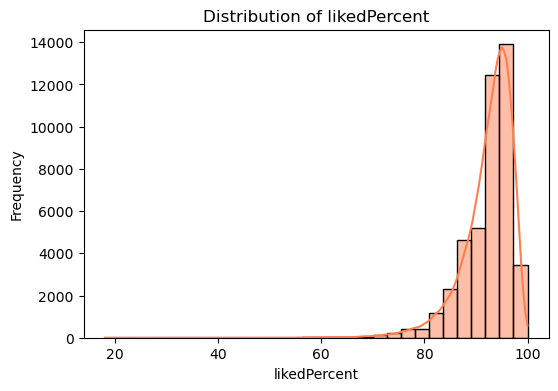

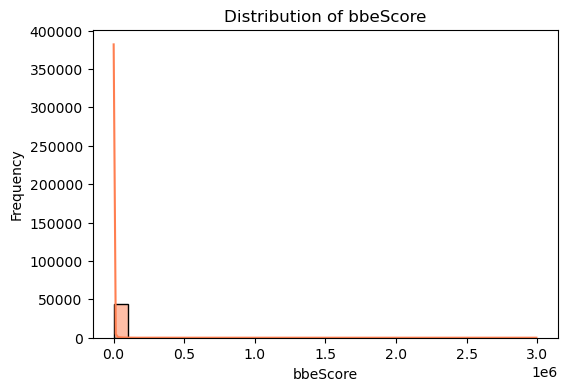

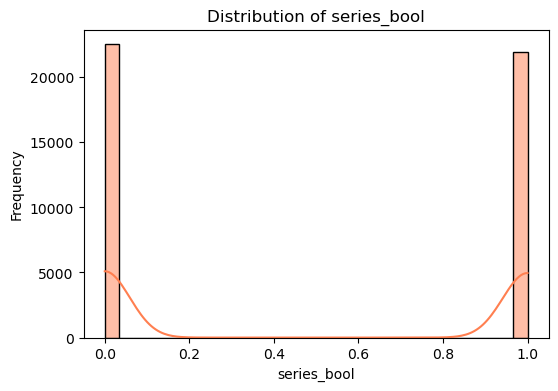

In [32]:
for col in df.columns:
    # Check if the column is numeric
    if df[col].dtype in ['int64', 'float64', 'datetime64[ns]']:
        # Resize
        plt.figure(figsize=(6, 4))
        
        # Create histplot
        sns.histplot(df[col], kde=True, bins=30, color='coral')
        
        # Add labels: 
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        
        plt.show()

Notes on the distribution of the numerical columns:
- Ratings seem to be a relatively normal distribution, with a slightly longer tail on the left. 
- The distribution of the publish date and liked percent are left skewed 
- The distribution of pages, number of ratings, and bbeScore are right skewed
- The series (1 = has a series, 0 = does not have a series) is around 50% both ways. 

<a id = 'initial_exploration'></a>
### Visual Exploration

In [67]:
top_languages = df.groupby('language')['title'].count().sort_values(ascending=False).head(10).reset_index(name='Number of Books')

# Plotting using plotly express
fig = px.bar(top_languages, x='language', y='Number of Books', title='Top 10 Languages by Number of Books')
fig.show()

In this dataset, english is the top language by far. For this modeling project, I will likely drop all other languages except english.

Look at the relationship between publish date and rating:

In [68]:
fig = px.scatter(df, x='publishDate', y='rating', title='Relationship between Rating and Publish Date', opacity=0.5)
fig.show()

There does not seem to be a relationship between the publish date and the rating. In this dataset, the majority of books are published between 1960 to 2020.

In [34]:
fig = px.scatter(df, x='pages', y='rating', title='Relationship between Rating and Publish Date', opacity=0.5)
fig.update_xaxes(range=[0,3600]) # showing books that have 3,600 or less pages
fig.show()

Most of the data is clustered around a rating of 3.5-4.5 and page length between 0-1,000.

In [77]:
top_authors = df.groupby('author')['title'].count().sort_values(ascending=False).head(10).reset_index(name='Number of Books')

# Plotting using plotly express
fig = px.bar(top_authors, x='author', y='Number of Books', title='Top 10 Languages by Number of Books')
fig.show()

The author with the most amount of books in the dataset is Nora Roberts with just over 80 books. Looking at the authors with most books might be interesting to see if this is correlated with likeability. More books could be a sign that the author is popular. 

In [79]:
# Look at the top 100 authors, based on their mean rating:
top_authors = df.groupby('author')['rating'].mean().nlargest(50).reset_index()
top_authors

author    rating
0                                         Ginger Baum  4.970000
1   Ki Longfellow (Goodreads Author), Ben Wickey (...  4.930000
2                                        Sharon Storm  4.920000
3               Desiree M. Granger (Goodreads Author)  4.900000
4               Rohith S. Katbamna (Goodreads Author)  4.850000
5                   Kenneth Thomas (Goodreads Author)  4.835000
6                                    Jo-Anne McArthur  4.830000
7          Tui T. Sutherland, Bea Reiter (Translator)  4.810000
8                        Scholastic Inc (Contributor)  4.800000
9   Kait Fennell, Joe Martin, George Patterson, Jo...  4.790000
10                                     Miljenko Smoje  4.790000
11     Mustafa Kemal Atatürk, Zeynep Korkmaz (Editor)  4.790000
12                            Vineeta Malhotra Taneja  4.790000
13                   William Shakespeare, Doug Moston  4.790000
14  Anonymous, Lane T. Dennis (Editor), Wayne Grud...  4.780000
15            Banani Ray (Goodreads Author), Amit Ray  4.780000
16                                             Telanu  4.780000
17                      Afroz Alam (Goodreads Author)  4.770000
18                   Brenda Perlin (Goodreads Author)  4.770000
19    George Mendoza, Doris Susan Smith (Illustrator)  4.770000
20                                      Changdictator  4.760000
21                 Fletcher McHale (Goodreads Author)  4.760000
22  One Direction, Niall Horan, Louis Tomlinson, L...  4.760000
23                                              Quino  4.760000
24  Andrew Peterson (Goodreads Author), Joe Sutphi...  4.750000
25  Georg Trakl, Jim Doss (Translator), Werner Sch...  4.750000
26                   Tajana Sutton (Goodreads Author)  4.750000
27      Francisco Cândido Xavier, Emmanuel (Narrator)  4.740000
28  Nick Brandt, Vicki Goldberg (Goodreads Author)...  4.740000
29           Nâzım Hikmet Ran, Genco Erkal (Narrator)  4.740000
30                                      Otar Chiladze  4.740000
31                                  Sue Lloyd-Roberts  4.740000
32                  Amanda Barratt (Goodreads Author)  4.730000
33  David Attenborough, Jonnie Hughes (Goodreads A...  4.730000
34  John Lewis, Andrew Aydin (Goodreads Author), N...  4.730000
35                 Sukumar Ray, Satyajit Ray (Editor)  4.730000
36               Snehlata Agarwala (Goodreads Author)  4.725000
37  Constantinos P. Cavafy, Κ.Π. Καβάφης, Γ.Π. Σαβ...  4.720000
38                  Angelika Meyer (Goodreads Author)  4.720000
39                                         Anna Green  4.720000
40  John Andrew Simpson (Editor), E.S.C. Weiner (E...  4.720000
41                     John Williams, Nicholas Hooper  4.720000
42                                          Orlandeli  4.720000
43                                     Bill Watterson  4.717333
44                                 Alena Mornštajnová  4.710000
45                                Anița Nandriș-Cudla  4.710000
46            Bill Watterson, Pat Oliphant (Foreword)  4.710000
47                                      Chanel Miller  4.710000
48  Cindy Springsteen (Goodreads Author), Jim Bren...  4.710000
49                                Guram Dochanashvili  4.710000

In [98]:
fig = px.bar(top_authors, x='author', y='rating', title='Top 50 Authors by Mean Rating')
fig.update_layout(xaxis_tickangle=45)
 
fig.show()

Within the top 50 authors, there seems to be a slight change in the mean number of ratings. 

In [71]:
top_authors = df.groupby('author')['title'].count().sort_values(ascending=False).head(10).reset_index(name='Number of Books')

# Plotting using plotly express
fig = px.bar(top_authors, x='author', y='Number of Books', title='Top 10 Languages by Number of Books')
fig.show()

<a id = 'summary'></a>
### Summary & Insights

- The dataset still needs quite a bit more cleaning in order for it to be useful data.
- I am interested in seeing the relationship between the genres and the mean rating score. In order to do that, I will need to change the format since it's currently in a list and everything is grouped together. 
- I would like to see if I can use the description column to make further analysis on this dataset. Maybe there's key words that have an effect on the rating and overall likeability of the book.
- For the series column, I would like to group books together by their series and further investigate the rating of each series. This could be a good predictor for whether someone will like the book that is recommended to them. 
- The number of ratings may play a role in determining whether someone likes a book. More ratings can be a sign of popularity.

[Back to the top](#title)